# Principal Component Analysis (PCA)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')

In [3]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

As the counts are not matching across the columns, there seems to be some missing values for those columns where count is less than 846. For most of the attributes where we see missing values the mean and median values are not having much difference.
For radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about we can see max value is far from mean/median so there can be outliers. We can boxplot these attributes to visualize if outliers are there.

In [6]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
vehicle_df.fillna(vehicle_df.median(),inplace=True)

In [8]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
import seaborn as sns

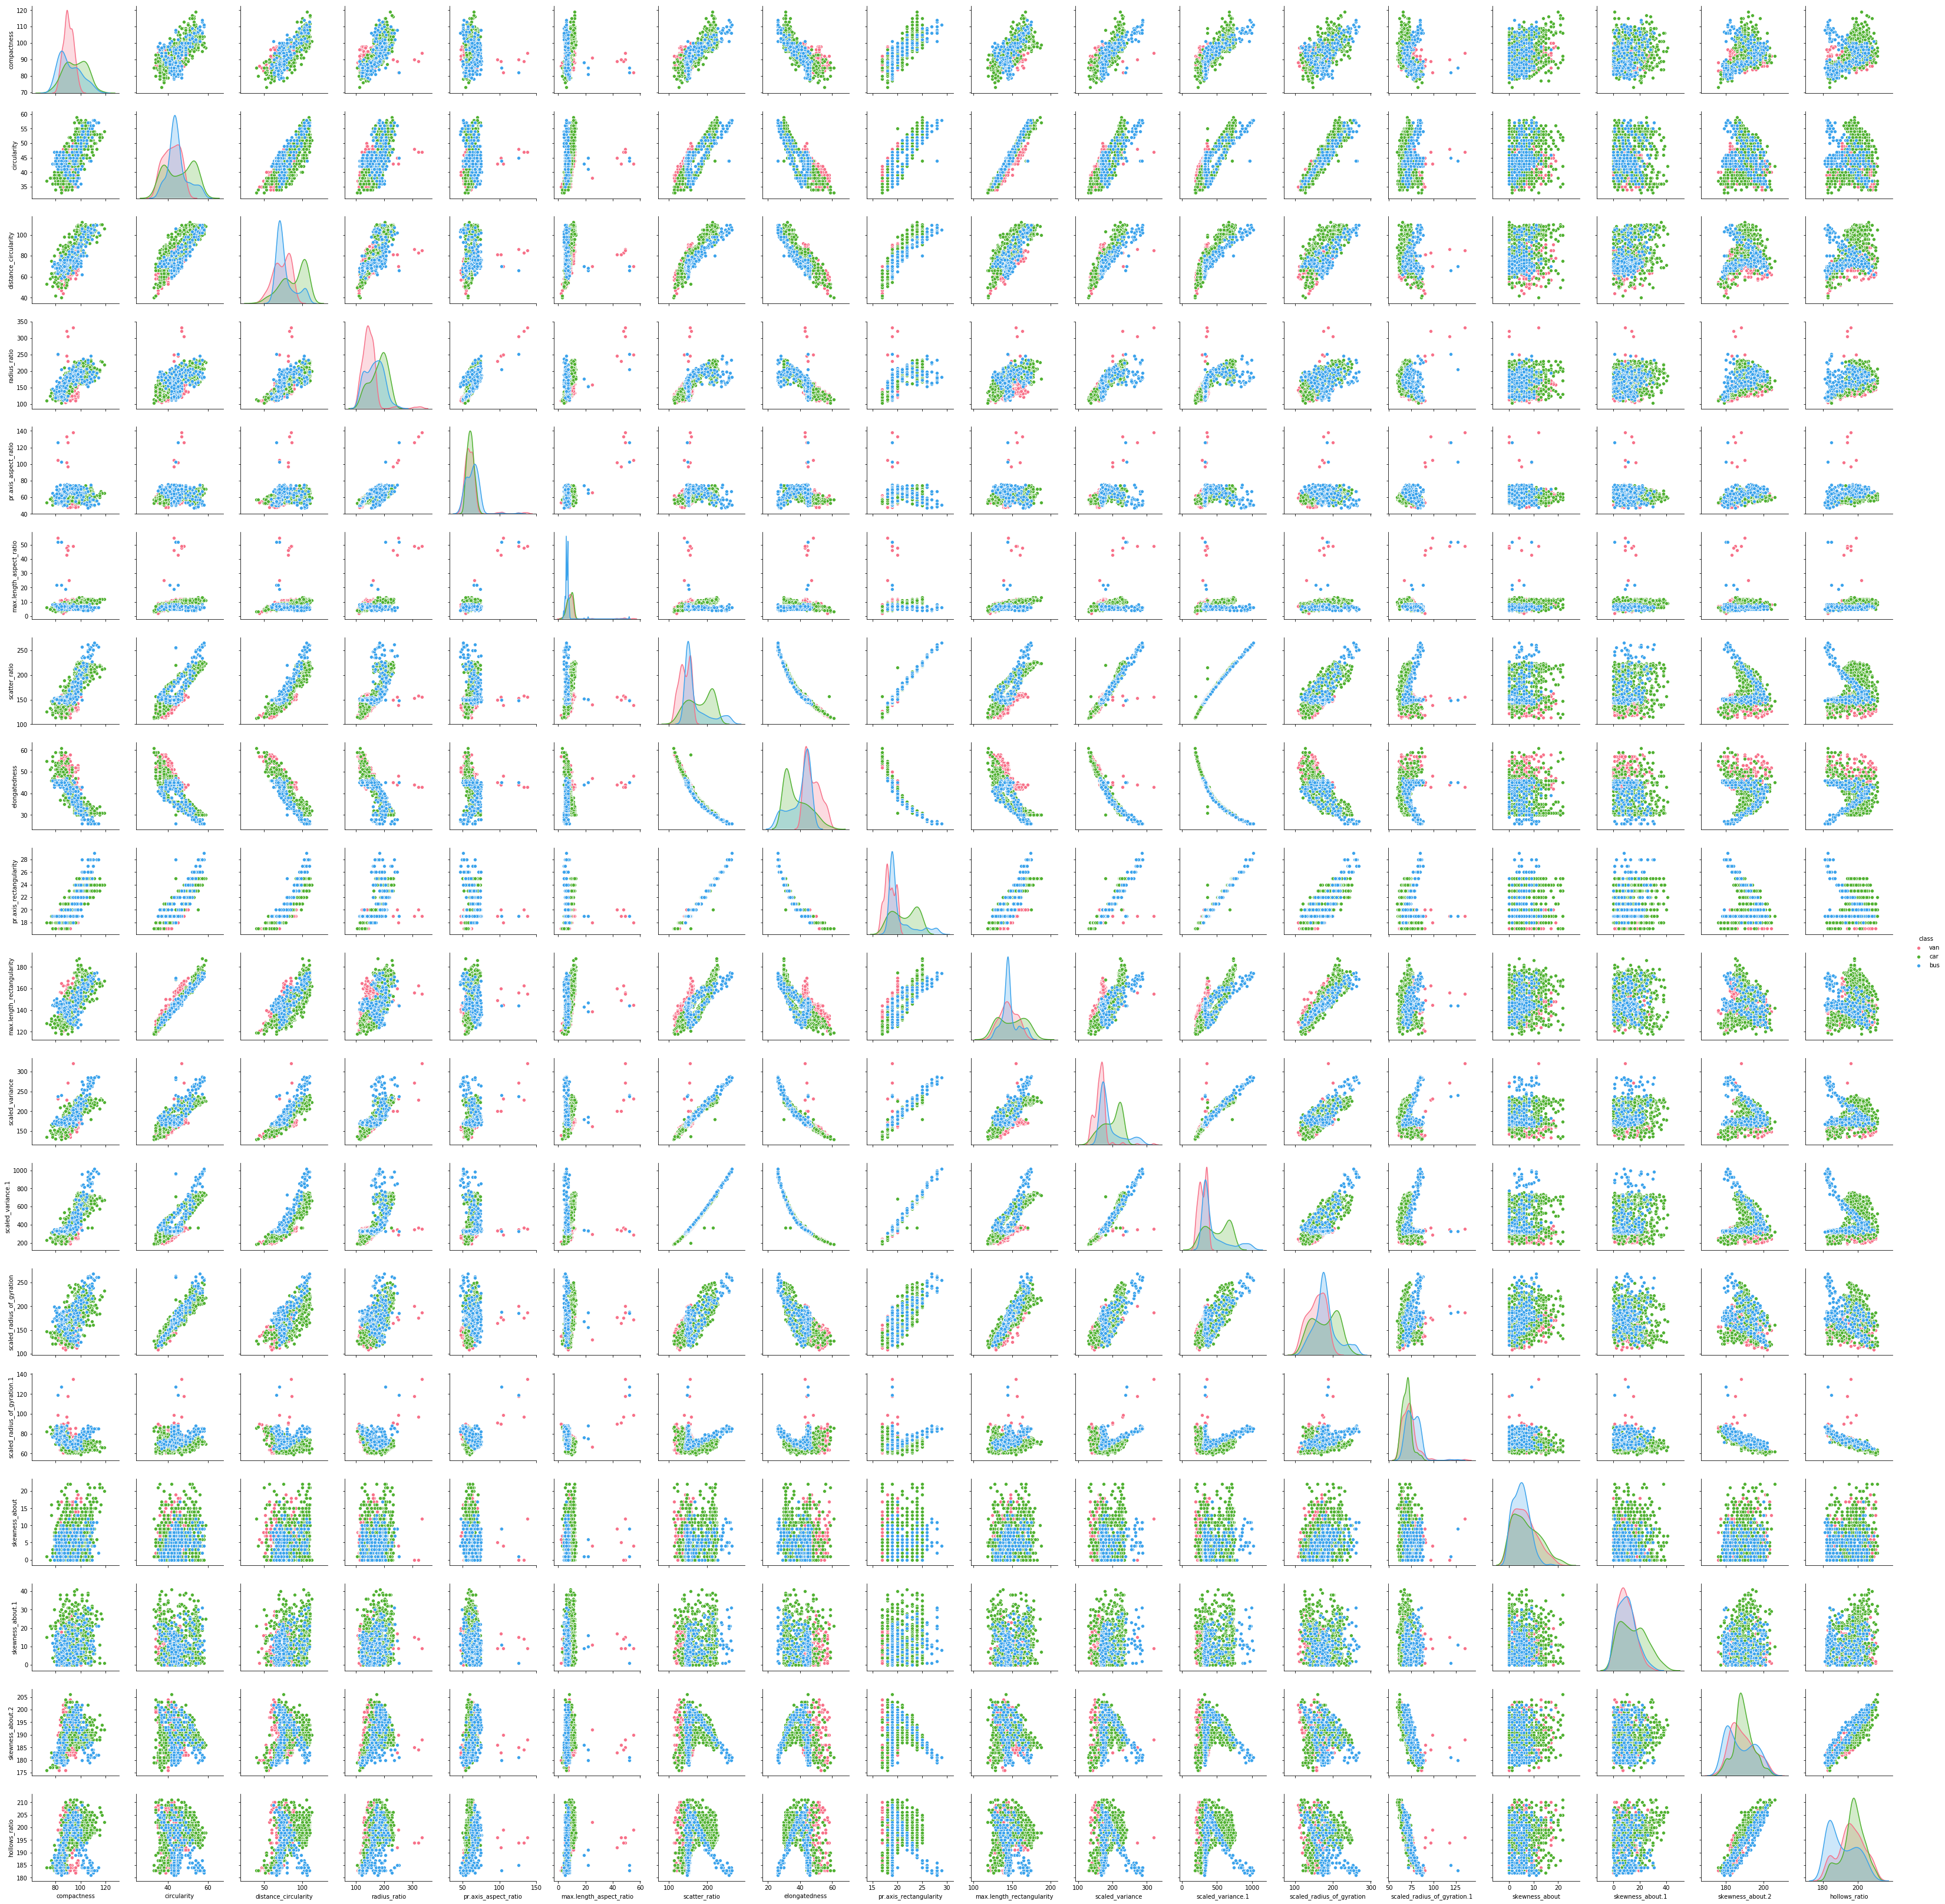

In [17]:
sns.pairplot(vehicle_df, hue="class", palette="husl")

- For columns scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio the distribution is almost sperical or clustered. We can decide whether to drop these depending on further EDA.
- For columns scatter_ratio, pr.axis_rectangularity, scaled_variance, scaled_variance.1 the distribution is somewhat linear. 
- We can verify the co-relation of all these independent variables and check if we can drop some of the highly corelated columns.

scatter_ratio is highly correlated with compactness, circularity, distance_circularity, radius_ratio, pr.axis_rectangularity, max.length_rectangularity etc

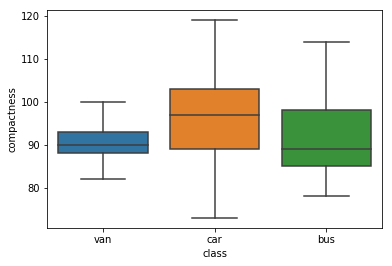

In [10]:
sns.boxplot(x="class", y="compactness", data=vehicle_df)

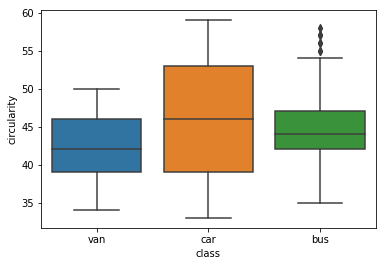

In [11]:
sns.boxplot(x="class", y="circularity", data=vehicle_df)

In [12]:
q1, q3= np.percentile(vehicle_df.circularity[vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
uppr_bound = q3 +(1.5 * iqr) 
print(lower_bound,uppr_bound )

34.5 54.5


In [13]:
vehicle_df.loc[(vehicle_df['circularity']>54.5) & (vehicle_df['class']=='bus'), 'circularity'] = 54.5

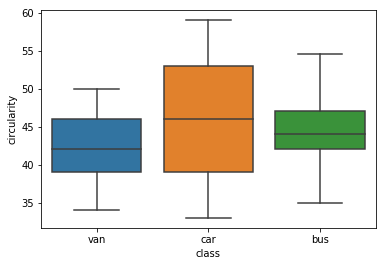

In [14]:
sns.boxplot(x="class", y="circularity", data=vehicle_df)

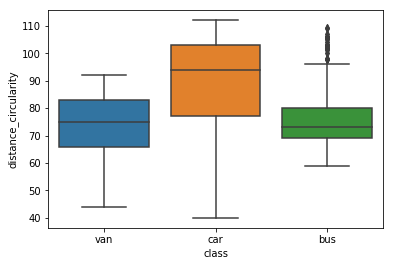

In [15]:
sns.boxplot(x="class", y="distance_circularity", data=vehicle_df)

In [16]:
q1, q3= np.percentile(vehicle_df.distance_circularity[vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
uppr_bound = q3 +(1.5 * iqr) 
print(lower_bound,uppr_bound )

52.5 96.5


In [17]:
vehicle_df.loc[(vehicle_df['distance_circularity']>96.5) & (vehicle_df['class']=='bus'), 'distance_circularity'] = 96.5

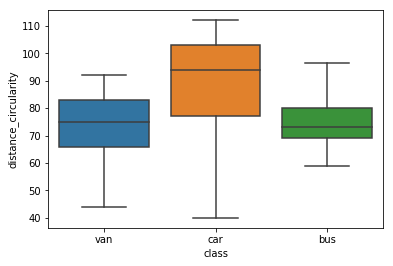

In [18]:
sns.boxplot(x="class", y="distance_circularity", data=vehicle_df)

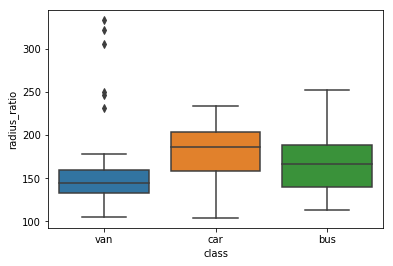

In [19]:
sns.boxplot(x="class", y="radius_ratio", data=vehicle_df)

In [20]:
q1, q3= np.percentile(vehicle_df.radius_ratio[vehicle_df['class']=='van'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

78.5 213.5


In [21]:
vehicle_df.loc[(vehicle_df['radius_ratio']>213.5) & (vehicle_df['class']=='van'), 'radius_ratio'] = 213.5

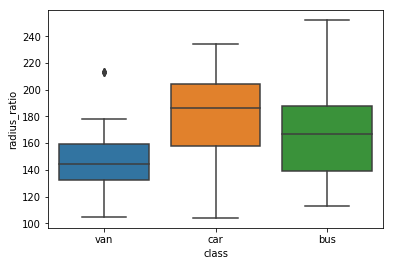

In [22]:
sns.boxplot(x="class", y="radius_ratio", data=vehicle_df)

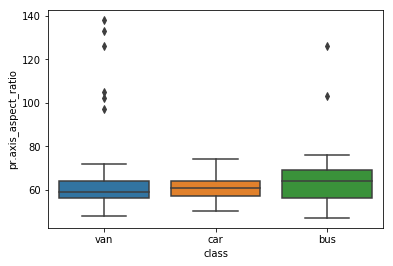

In [23]:
sns.boxplot(x="class", y="pr.axis_aspect_ratio", data=vehicle_df)

In [24]:
q1, q3= np.percentile(vehicle_df['pr.axis_aspect_ratio'][vehicle_df['class']=='van'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

40.0 80.0


In [25]:
vehicle_df.loc[(vehicle_df['pr.axis_aspect_ratio']>80) & (vehicle_df['class']=='van'), 'pr.axis_aspect_ratio'] = 80

In [26]:
q1, q3= np.percentile(vehicle_df['pr.axis_aspect_ratio'][vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

30.0 95.0


In [27]:
vehicle_df.loc[(vehicle_df['pr.axis_aspect_ratio']>95) & (vehicle_df['class']=='bus'), 'pr.axis_aspect_ratio'] = 95

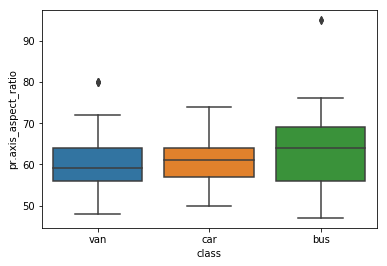

In [28]:
sns.boxplot(x="class", y="pr.axis_aspect_ratio", data=vehicle_df)

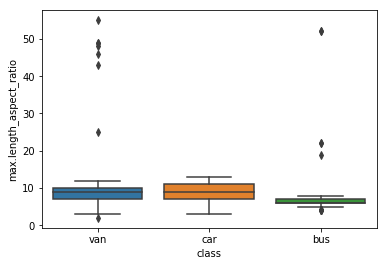

In [29]:
sns.boxplot(x="class", y="max.length_aspect_ratio", data=vehicle_df)

In [30]:
q1, q3= np.percentile(vehicle_df['max.length_aspect_ratio'][vehicle_df['class']=='van'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(3 * iqr) 
uppr_bound = q3 +(3 * iqr) 
print(lower_bound,uppr_bound )

-2.0 19.0


In [31]:
vehicle_df.loc[(vehicle_df['max.length_aspect_ratio']>19) & (vehicle_df['class']=='van'), 'max.length_aspect_ratio'] = 19

In [32]:
q1, q3= np.percentile(vehicle_df['max.length_aspect_ratio'][vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(3 * iqr) 
uppr_bound = q3 +(3 * iqr) 
print(lower_bound,uppr_bound )

3.0 10.0


In [33]:
vehicle_df.loc[(vehicle_df['max.length_aspect_ratio']>10) & (vehicle_df['class']=='bus'), 'max.length_aspect_ratio'] = 10

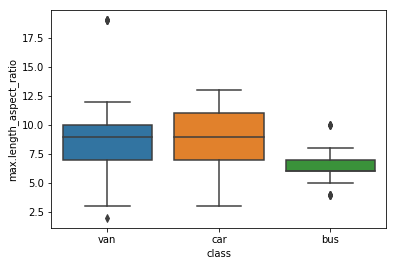

In [34]:
sns.boxplot(x="class", y="max.length_aspect_ratio", data=vehicle_df)

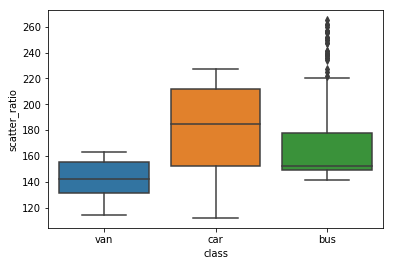

In [35]:
sns.boxplot(x="class", y="scatter_ratio", data=vehicle_df)

In [36]:
q1, q3= np.percentile(vehicle_df['scatter_ratio'][vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

vehicle_df.loc[(vehicle_df['scatter_ratio']>uppr_bound) & (vehicle_df['class']=='bus'), 'scatter_ratio'] = uppr_bound

91.5 235.25


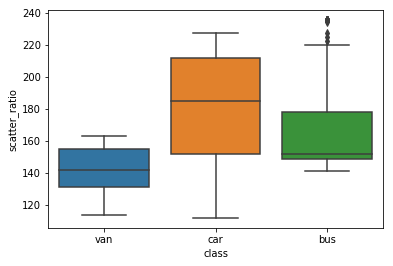

In [37]:
sns.boxplot(x="class", y="scatter_ratio", data=vehicle_df)

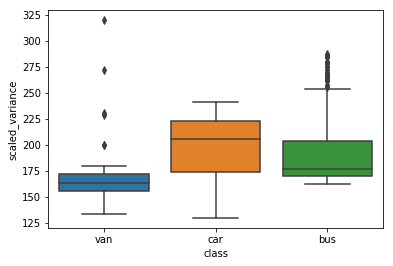

In [38]:
sns.boxplot(x="class", y="scaled_variance", data=vehicle_df)

In [39]:
q1, q3= np.percentile(vehicle_df['scaled_variance'][vehicle_df['class']=='van'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

vehicle_df.loc[(vehicle_df['scaled_variance']>uppr_bound) & (vehicle_df['class']=='van'), 'scaled_variance'] = uppr_bound

124.0 204.0


In [40]:
q1, q3= np.percentile(vehicle_df['scaled_variance'][vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

vehicle_df.loc[(vehicle_df['scaled_variance']>uppr_bound) & (vehicle_df['class']=='bus'), 'scaled_variance'] = uppr_bound

102.5 271.25


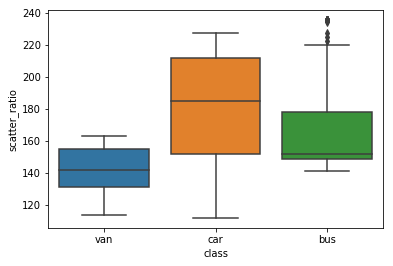

In [41]:
sns.boxplot(x="class", y="scatter_ratio", data=vehicle_df)

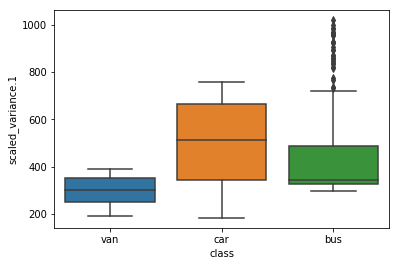

In [42]:
sns.boxplot(x="class", y="scaled_variance.1", data=vehicle_df)

In [43]:
q1, q3= np.percentile(vehicle_df['scaled_variance.1'][vehicle_df['class']=='bus'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(2 * iqr) 
uppr_bound = q3 +(2 * iqr) 
print(lower_bound,uppr_bound )

vehicle_df.loc[(vehicle_df['scaled_variance.1']>uppr_bound) & (vehicle_df['class']=='bus'), 'scaled_variance.1'] = uppr_bound

8.0 805.5


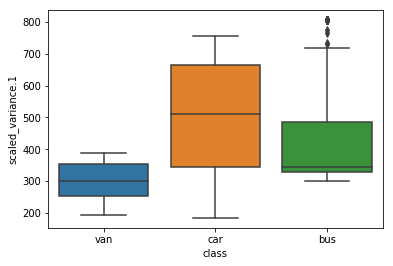

In [44]:
sns.boxplot(x="class", y="scaled_variance.1", data=vehicle_df)

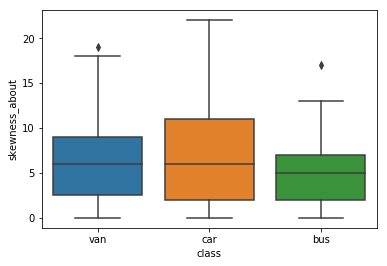

In [45]:
sns.boxplot(x="class", y="skewness_about", data=vehicle_df)

In [47]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(["bus","car","van"])
vehicle_df['class']=num.transform(vehicle_df['class']).astype('int')

In [48]:
corr = vehicle_df.corr()

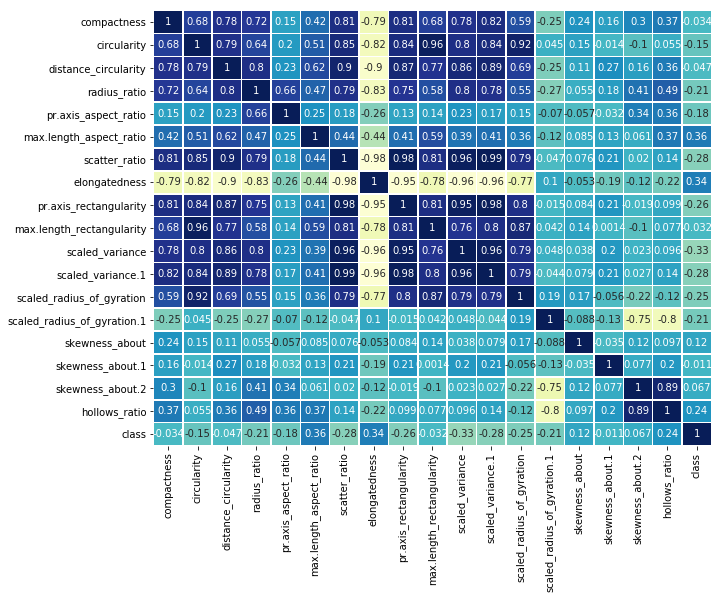

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(vehicle_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio does not show much corelation as compared to other attributes we have. These attributes show spherical/clustered distribution which would not be useful for PCA. So we may drop them.

scatter_ratio, cicularity are highly co-related with many attributes. scaled_variance, scaled_variance.1 are highly correlated too. So we can drop them as we would be retaining the other attributes they are corelated with.

In [50]:
vehicle_PCA = vehicle_df.drop(['circularity', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'scatter_ratio', 'scaled_variance', 'scaled_variance.1'], axis=1)

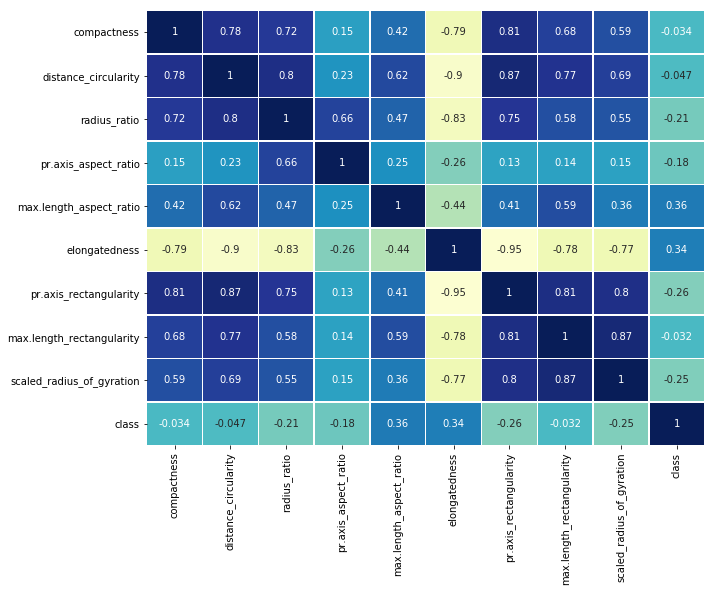

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(vehicle_PCA.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

C:\Users\JyotiK\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\JyotiK\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


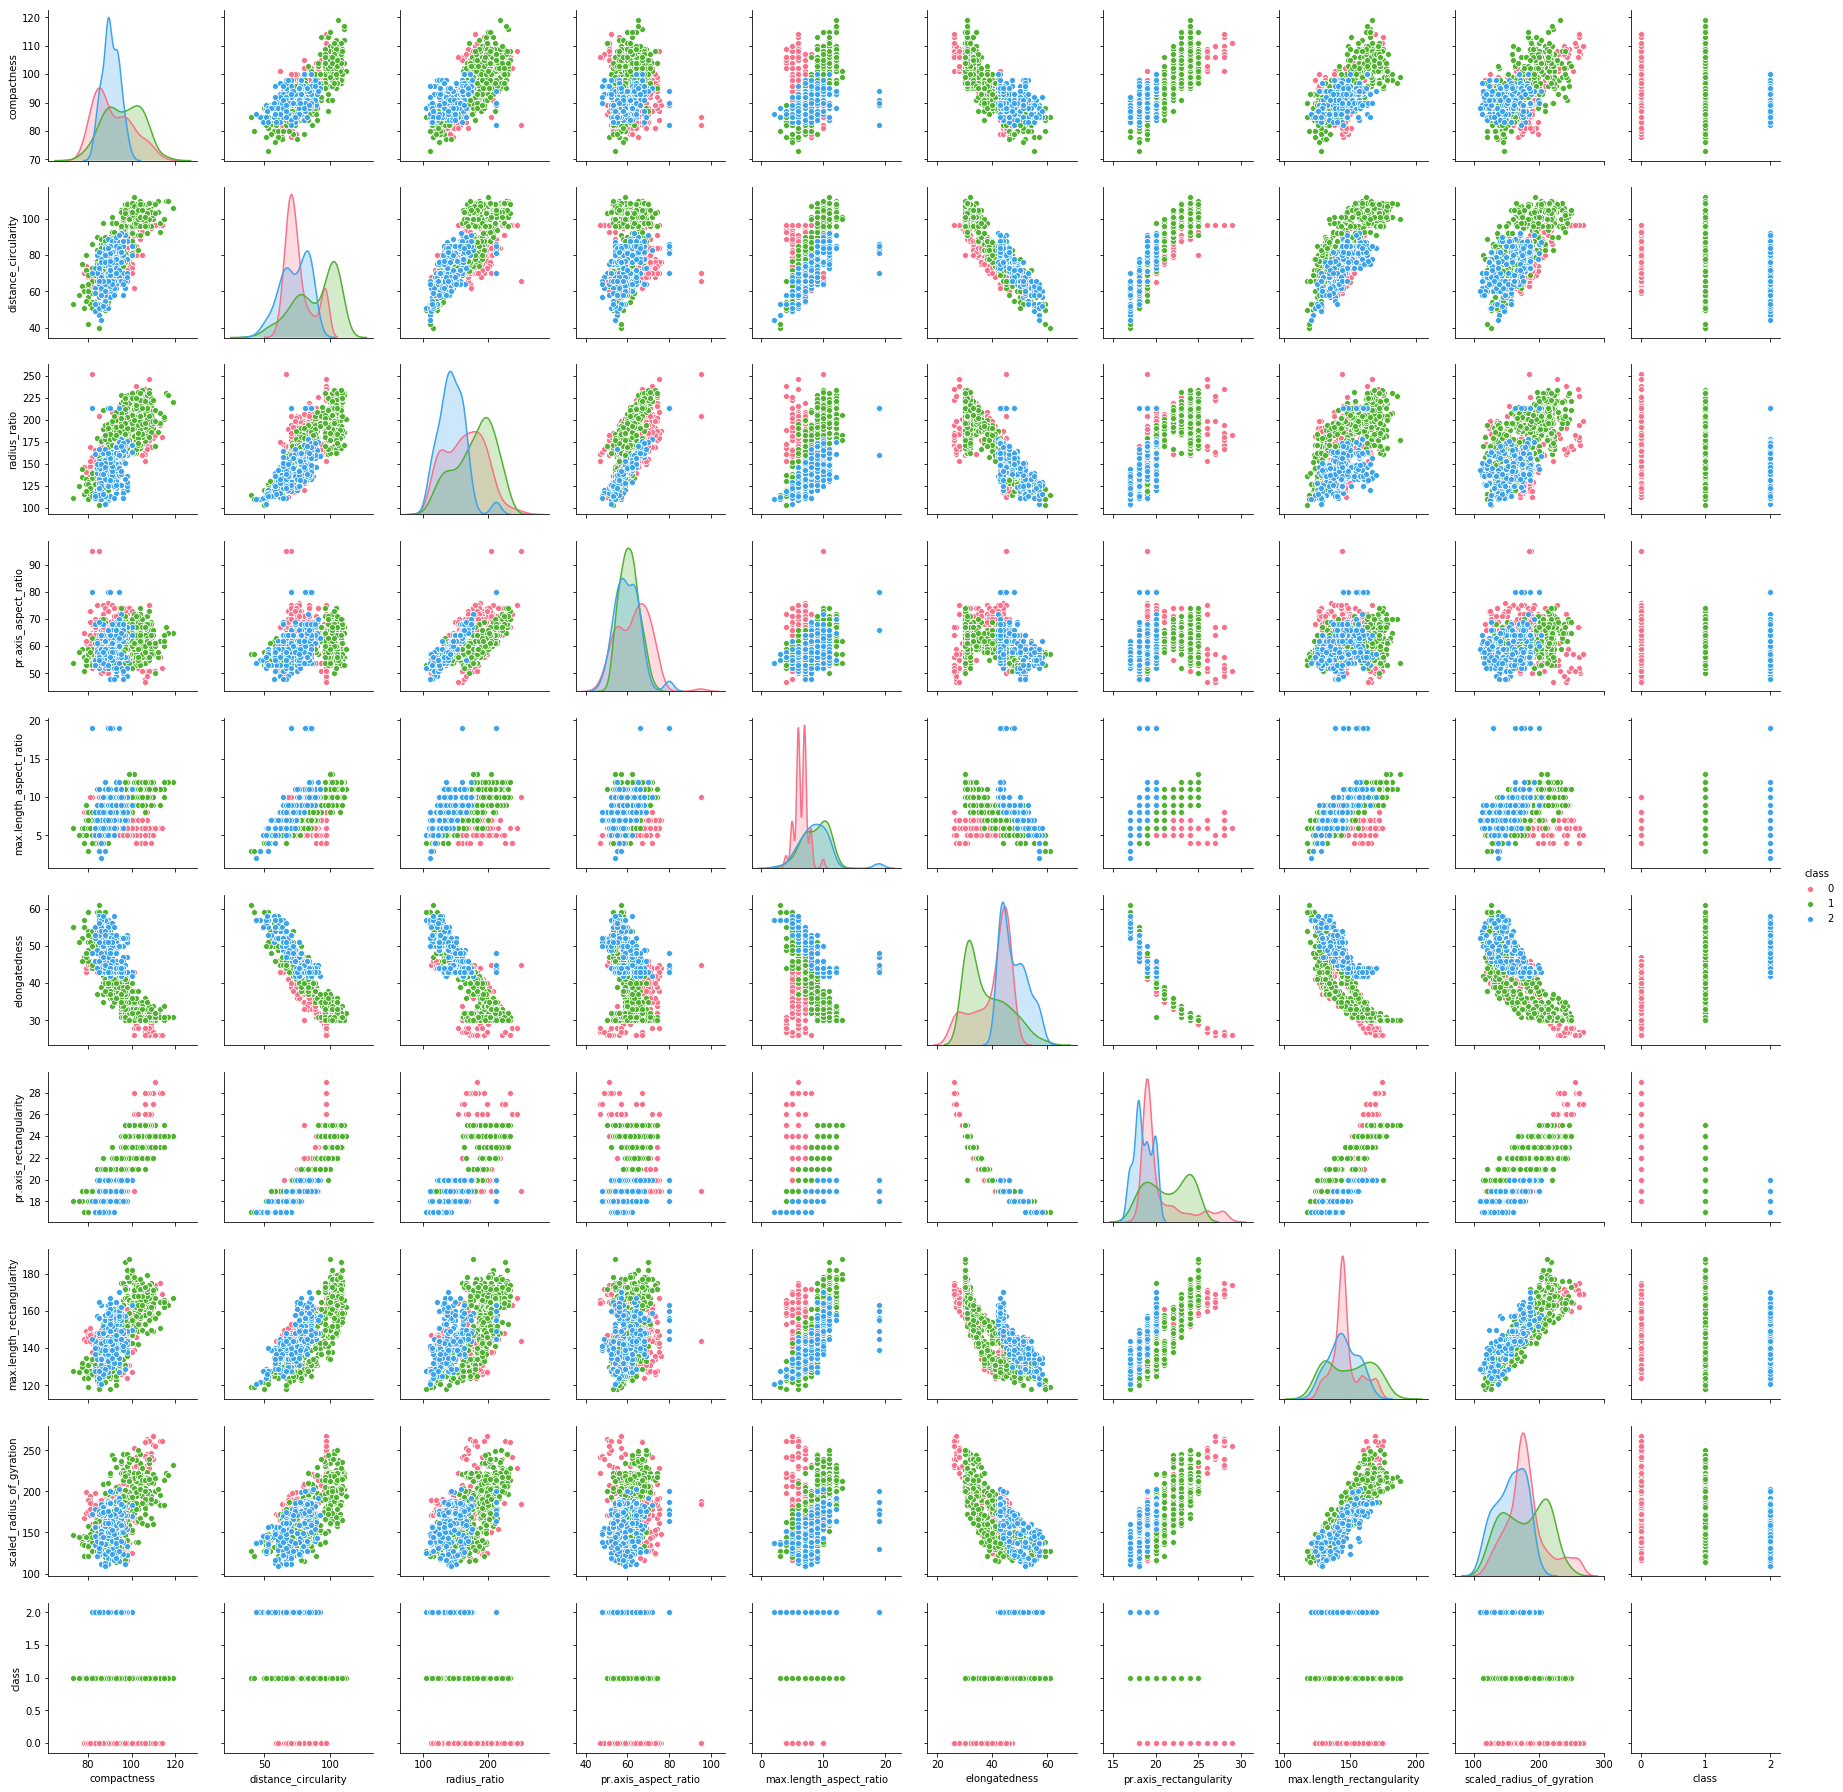

In [52]:
sns.pairplot(vehicle_PCA, hue="class", palette="husl")

In [53]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:

X = vehicle_PCA[vehicle_PCA.columns[1:-1]]
y = vehicle_PCA["class"]

In [91]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
       
X_std = X.apply(zscore)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.80328581  0.22936544  0.61736032 -0.90284905  0.87423523
   0.76904991  0.6876289 ]
 [ 0.80328581  1.00118343  0.66131443  0.472708   -0.82890208  0.74642797
   0.58441232  0.55511174]
 [ 0.22936544  0.66131443  1.00118343  0.25128488 -0.25951026  0.13096833
   0.14350538  0.14584321]
 [ 0.61736032  0.472708    0.25128488  1.00118343 -0.43660266  0.4150318
   0.59328846  0.35771151]
 [-0.90284905 -0.82890208 -0.25951026 -0.43660266  1.00118343 -0.95011894
  -0.77677186 -0.76722075]
 [ 0.87423523  0.74642797  0.13096833  0.4150318  -0.95011894  1.00118343
   0.81189327  0.79763248]
 [ 0.76904991  0.58441232  0.14350538  0.59328846 -0.77677186  0.81189327
   1.00118343  0.86747579]
 [ 0.6876289   0.55511174  0.14584321  0.35771151 -0.76722075  0.79763248
   0.86747579  1.00118343]]


In [92]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-4.04082010e-01 -4.13150586e-02  8.08562388e-02 -3.90005159e-01
  -4.15058561e-01 -6.37816196e-01 -2.25687298e-01 -2.15293229e-01]
 [-3.70760593e-01  3.95297693e-01 -1.80486708e-01 -2.34266537e-01
  -8.67070667e-03  1.43457548e-02  1.75759255e-01  7.66581865e-01]
 [-1.54101232e-01  8.13840717e-01 -1.24962528e-01  3.48443343e-01
   6.01442978e-02 -3.38549132e-02 -1.76941834e-01 -3.75254310e-01]
 [-2.67294682e-01  1.21632097e-01  8.89922236e-01 -2.98032613e-02
  -7.93372519e-02  3.37863517e-01  2.12082397e-02 -3.66347754e-03]
 [ 4.09381715e-01  6.37217159e-02  2.26006160e-01  2.57270684e-01
  -9.68171303e-02 -2.48052636e-01 -6.60270591e-01  4.51905129e-01]
 [-4.01210461e-01 -1.97401802e-01 -2.12588569e-01 -2.05822400e-01
   3.19646697e-01  4.11417407e-01 -6.61627195e-01 -5.75942282e-02]
 [-3.82084794e-01 -2.31743044e-01  1.54431216e-01  4.40226747e-01
   5.96628189e-01 -4.52731282e-01  1.12726515e-01  9.49721331e-02]
 [-3.59873120e-01 -2.61091850e-01 -1.82175501e-01  

In [93]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.356371110483923, array([-0.40408201, -0.37076059, -0.15410123, -0.26729468,  0.40938171,
       -0.40121046, -0.38208479, -0.35987312])), (1.208569785016622, array([-0.04131506,  0.39529769,  0.81384072,  0.1216321 ,  0.06372172,
       -0.1974018 , -0.23174304, -0.26109185])), (0.7458227018753765, array([ 0.08085624, -0.18048671, -0.12496253,  0.88992224,  0.22600616,
       -0.21258857,  0.15443122, -0.1821755 ])), (0.44472054333241007, array([-0.39000516, -0.23426654,  0.34844334, -0.02980326,  0.25727068,
       -0.2058224 ,  0.44022675,  0.60692958])), (0.09382632920409485, array([-0.41505856, -0.00867071,  0.0601443 , -0.07933725, -0.09681713,
        0.3196467 ,  0.59662819, -0.59179955])), (0.07835024741958284, array([-0.6378162 ,  0.01434575, -0.03385491,  0.33786352, -0.24805264,
        0.41141741, -0.45273128,  0.20476031])), (0.04449788839995189, array([-0.21529323,  0.76658187, -0.37525431, -0.00366348,  0.45190513,
       -0.05759423,  0.09497213,  0.09282674])), (0.

In [94]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%




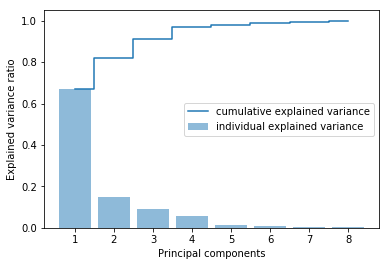

In [95]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [126]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[2:7])   # Reducing from 9 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [127]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

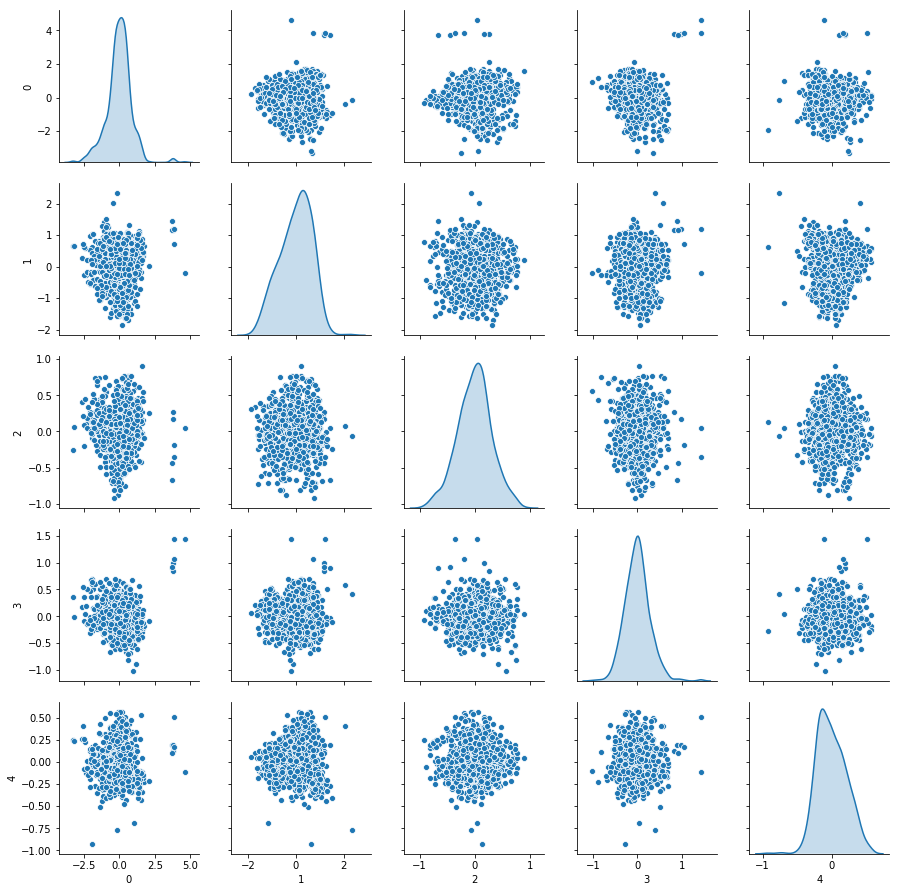

In [128]:
#Let us check it visually

sns.pairplot(Proj_data_df, diag_kind='kde') 

### SVM with PCA on predictors

In [132]:
# Let us build a SVM model on the PCA dimensions 

# Import Support Vector machine learning library
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.84
Accuracy on test set: 0.86


C:\Users\JyotiK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for SVM with PCA dimensions is 84% on trainig and 86% on testing data set.

### SVM without PCA on predictors 

In [157]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 8  # Random numbmer seeding for reapeatability of the code
X_trainO, X_testO, y_trainO, y_testO = model_selection.train_test_split(vehicle_df, y, test_size=test_size, random_state=seed)

In [158]:
# Let us build a SVM model without PCA dimensions 

# Import Support Vector machine learning library
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_trainO, y_trainO)

print("Accuracy on training set: {:.2f}".format(svc.score(X_trainO, y_trainO)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_testO, y_testO)))

Accuracy on training set: 1.00
Accuracy on test set: 0.45


C:\Users\JyotiK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [167]:
#The model overfits substantially with a perfect score on the training set and only 45% accuracy on the test set.

#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately on the same scale and than see the performance

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_trainO)
X_test_scaled = scaler.fit_transform(X_testO)

C:\Users\JyotiK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\JyotiK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [169]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_trainO)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_testO)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


C:\Users\JyotiK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [170]:
svc = SVC()
svc.fit(X_train_scaled, y_trainO)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_trainO)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_testO)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


C:\Users\JyotiK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
